Import dataset

In [1]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186).data.original
color = wine_quality['color'] #0 red 1 white
color = np.where(color == 'red', 0, 1) # convert to numerical values
y = wine_quality['quality']
X = wine_quality.drop(columns=['quality', 'color'])
print(len(X), "samples")

6497 samples


No missing values

In [2]:
X.isnull().sum().sum()

0

In [3]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [4]:
# Percentage of white and red wines
white_percentage = np.sum(color == 1) / len(color) * 100
red_percentage = np.sum(color == 0) / len(color) * 100
print(f"Percentage of white wines: {white_percentage:.2f}%")
print(f"Percentage of red wines: {red_percentage:.2f}%")

Percentage of white wines: 75.39%
Percentage of red wines: 24.61%


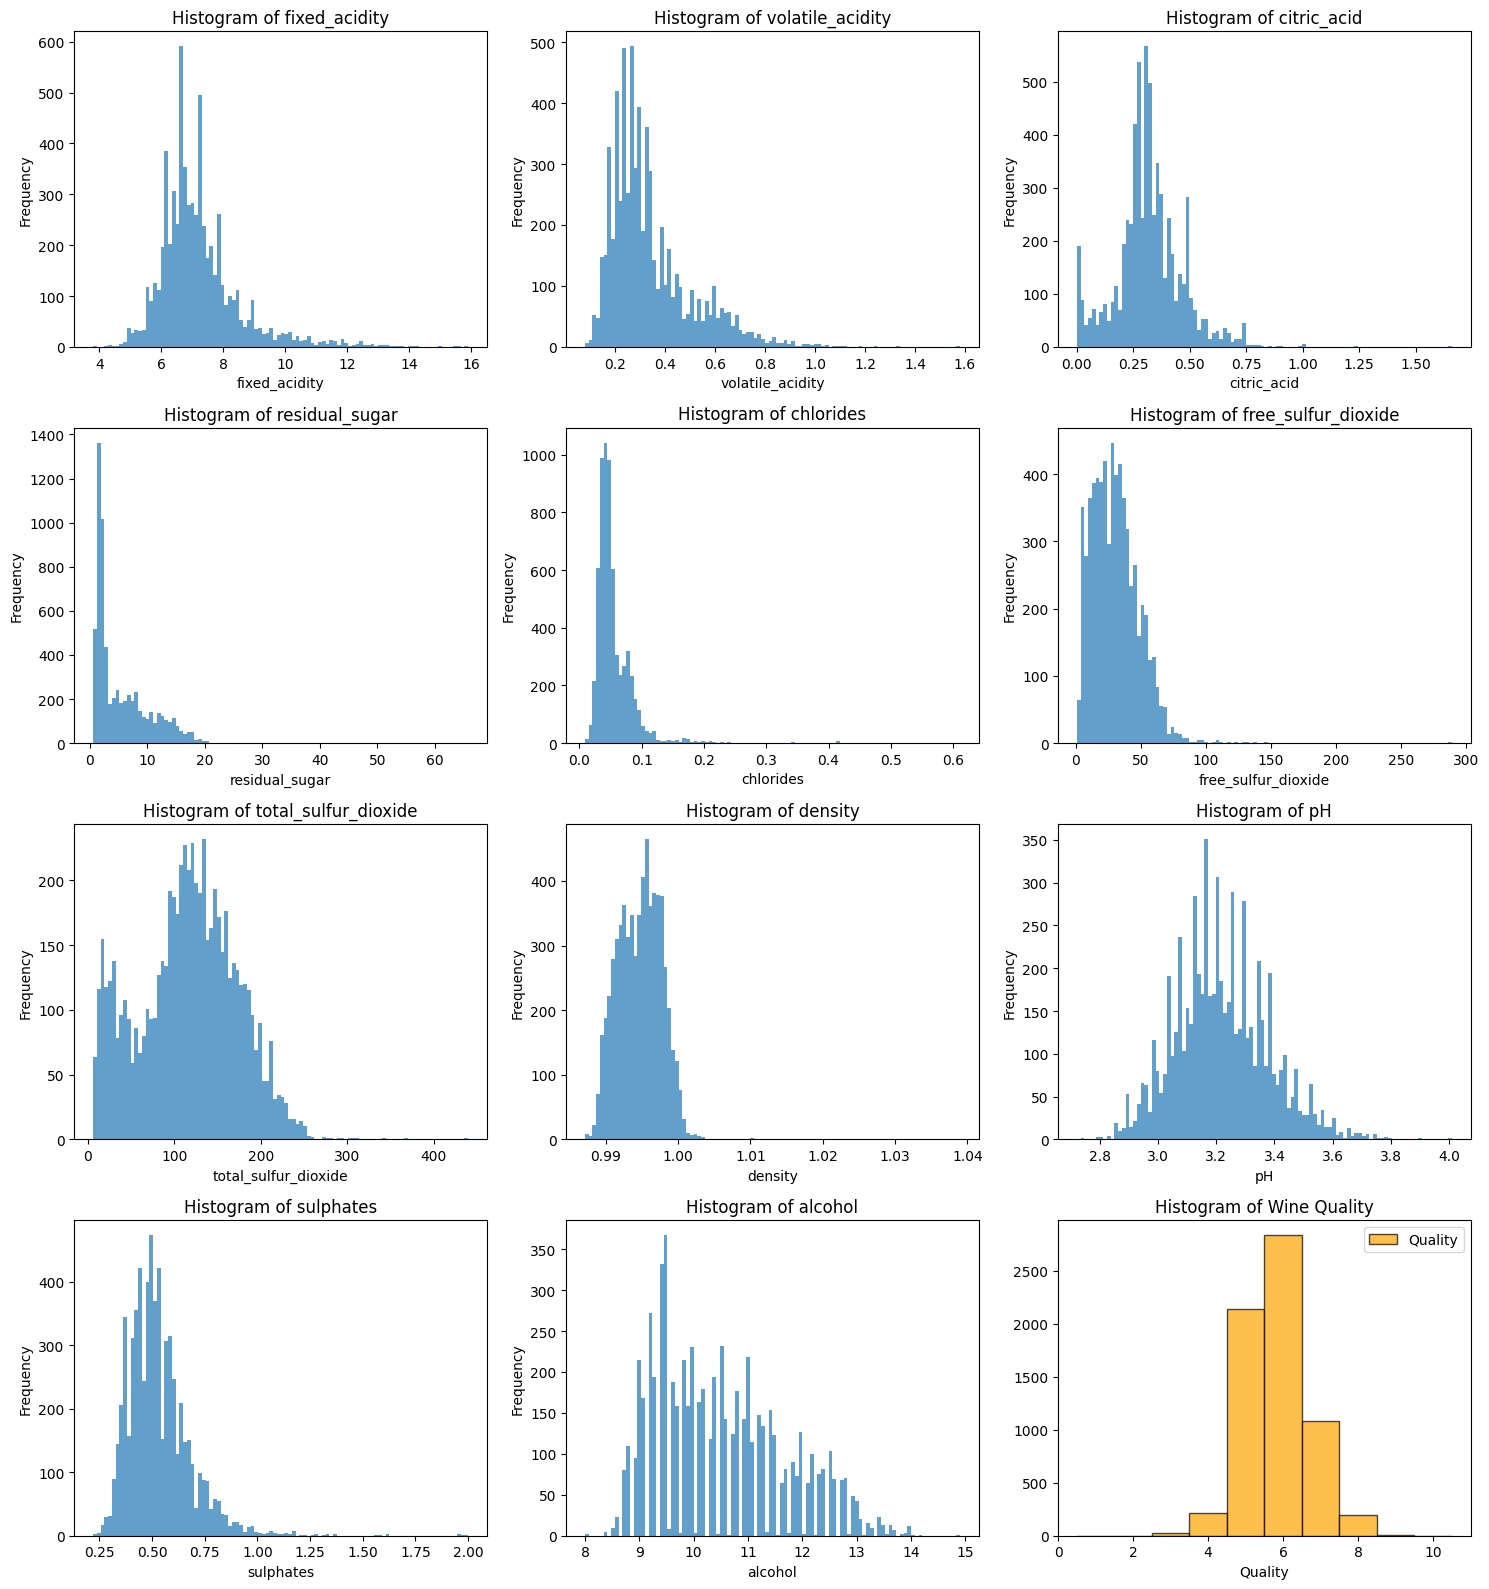

In [ ]:
# Plot histogram for each feature and quality in a grid layout
def plot_histograms(X, y):
    num_features = X.shape[1]
    num_rows = (num_features + 2) // 3  # 3 plots per row
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))
    
    for i, feature in enumerate(X.columns):
        ax = axes[i // 3, i % 3]
        ax.hist(X[feature], bins=100, alpha=0.7, label='Feature')
        ax.set_title(f'Histogram of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
    # Add quality distribution
    ax = axes[-1, -1]  # Last subplot
    # Histogram binned by discrete quality values between 0 and 10
    ax.hist(y, bins=np.arange(0.5, 11.5, 1), alpha=0.7, color='orange', label='Quality', edgecolor='black')
    ax.set_title('Histogram of Wine Quality')
    ax.set_xlabel('Quality')
    
    plt.tight_layout()
    plt.legend()
    plt.show()
plot_histograms(X, y)

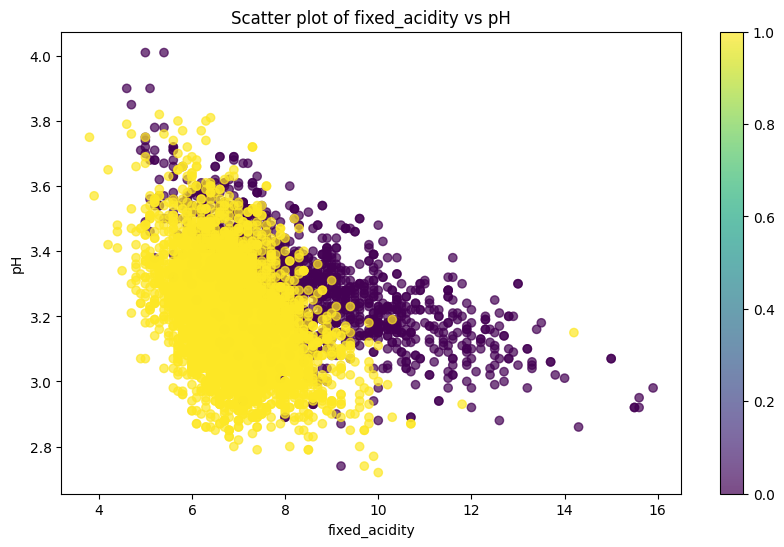

In [6]:
def scatter_plot(X, y, feature1, feature2, color_feature):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[feature1], X[feature2], c=color_feature, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Scatter plot of {feature1} vs {feature2}')
    plt.show()

scatter_plot(X, y, 'fixed_acidity', 'pH', color)

C:\Users\Çağan\AppData\Local\Temp\ipykernel_9044\1027581143.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


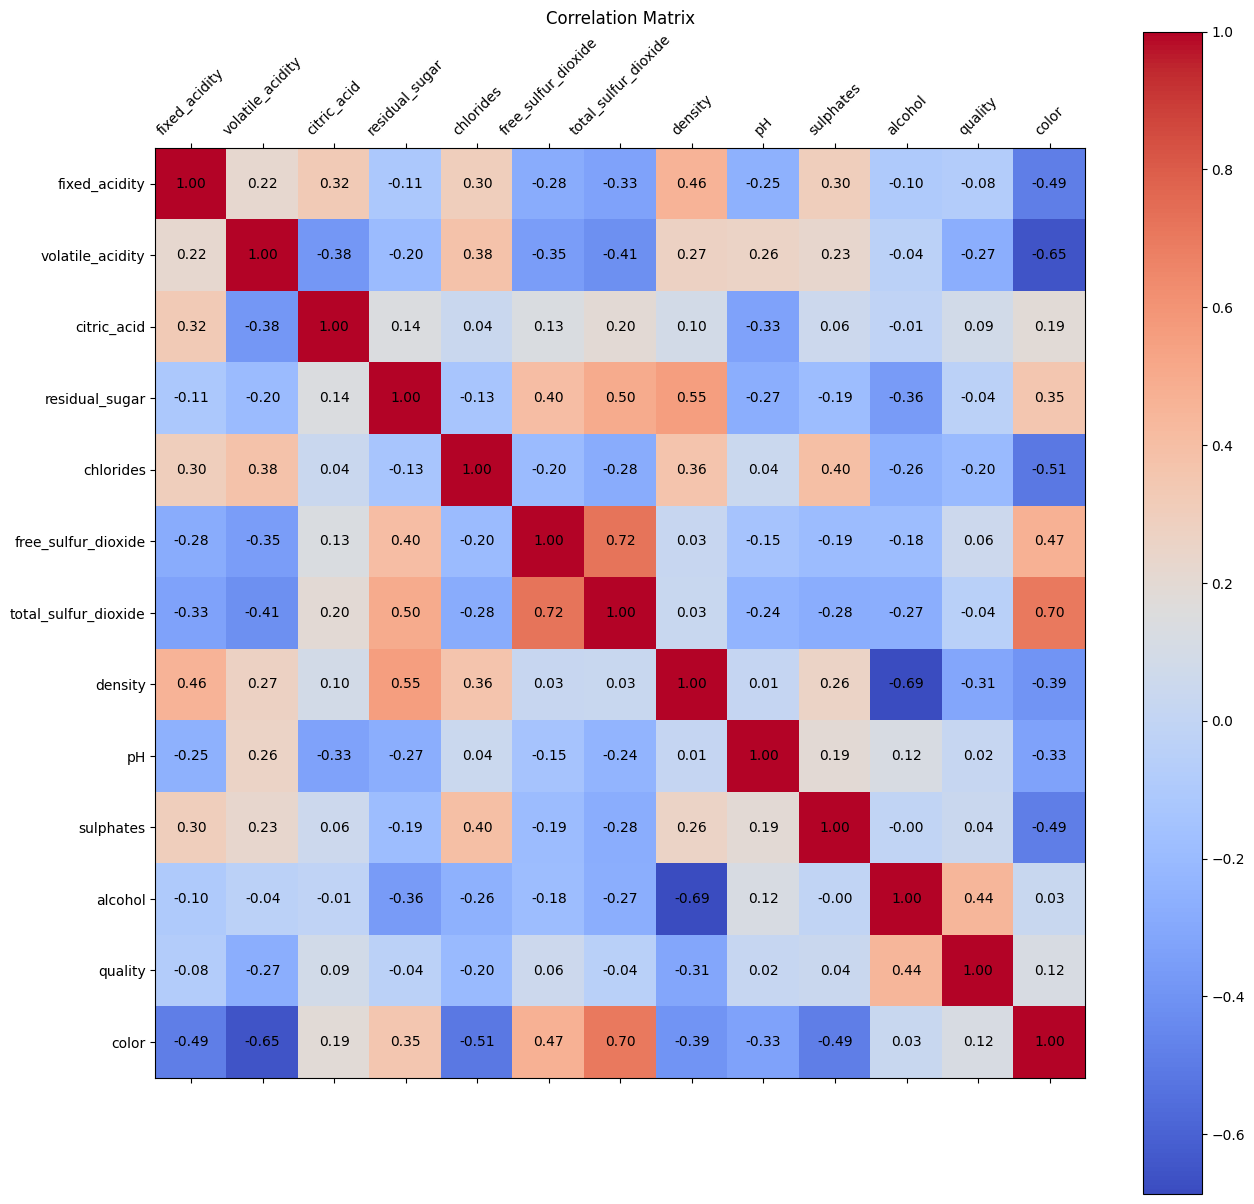

In [7]:
# Plot correlation matrix also containing quality and color and fit the names and display values on the cells
def plot_correlation_matrix(X, y, color):
    df = pd.DataFrame(X)
    df['quality'] = y
    df['color'] = color
    corr = df.corr()
    
    plt.figure(figsize=(15, 15))
    cax = plt.matshow(corr, cmap='coolwarm', fignum=1)
    plt.colorbar(cax)
    
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
    
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
plot_correlation_matrix(X, y, color)

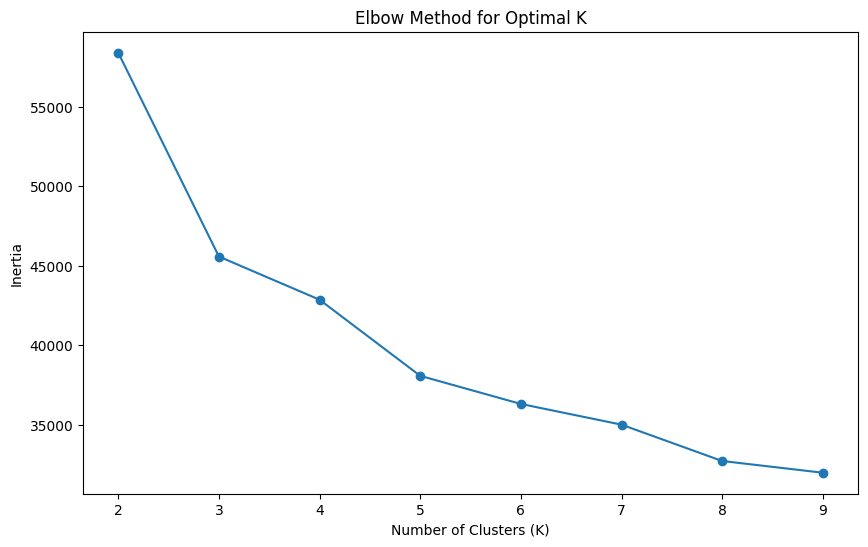

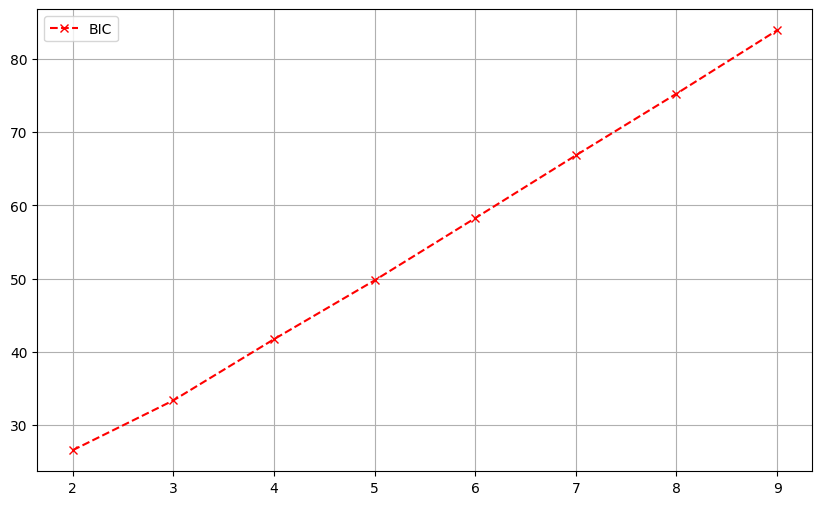

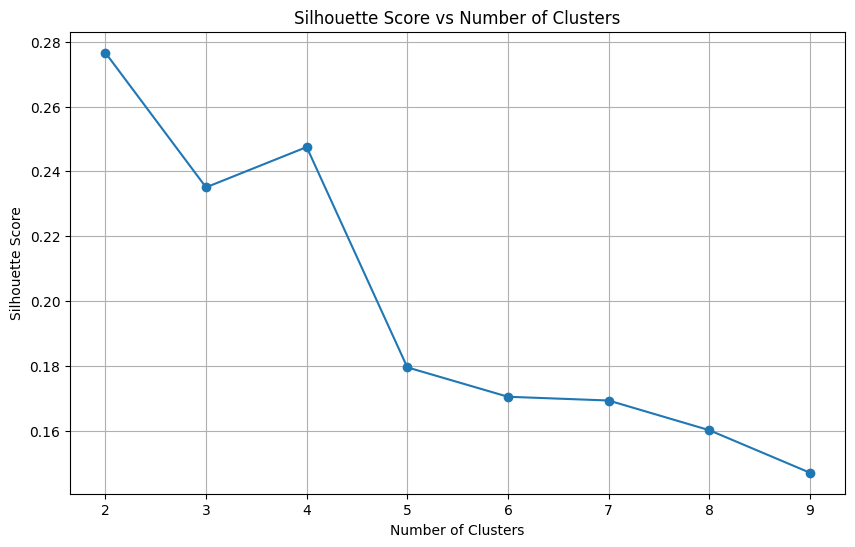

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
X_scaled = StandardScaler().fit_transform(X)
k_range = range(2, 10)
#Calculate elbow method to find optimal number of clusters
inertia = []
bics = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=35235)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    #Calculate BIC
    bic = kmeans.inertia_ / len(X_scaled) + (k * np.log(len(X_scaled)))
    bics.append(bic)
plt.figure(figsize=(10, 6))
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.plot(k_range, inertia, marker='o')

# Silhouette score to find optimal number of clusters
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=32523)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid()
plt.show()

Explained variance by PCA components: 0.5021540614343645


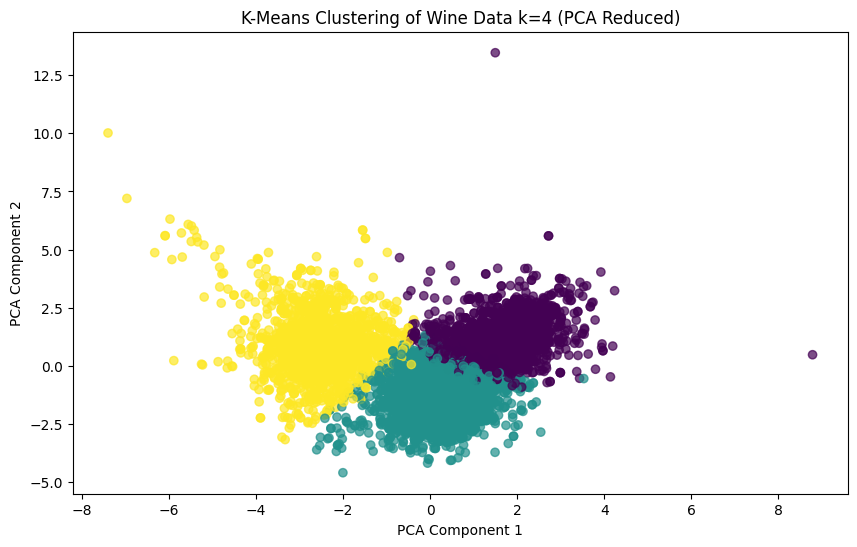

In [27]:
#Choose k=3
kmeans = KMeans(n_clusters=3, random_state=31531362)
assigned_clusters = kmeans.fit_predict(X_scaled)
# Do PCA down to 2D for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f'Explained variance by PCA components: {np.sum(pca.explained_variance_ratio_)}')
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=assigned_clusters, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering of Wine Data k=4 (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [78]:
# Compare cluster average values: (features, quality and color) to just splitting by color
cluster_means = pd.DataFrame(X_scaled,columns=X.columns).groupby(assigned_clusters).mean()
y_df = pd.DataFrame(y, columns=["quality"])
cluster_means['quality'] = pd.DataFrame(y_df, columns=["quality"]).groupby(assigned_clusters).mean()
cluster_means['color'] = pd.DataFrame(color, columns=["color"]).groupby(assigned_clusters).mean()

In [79]:
print("Cluster Means:")
cluster_means

Cluster Means:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,-0.184454,-0.351858,0.277935,1.206545,-0.089738,0.850474,0.959136,0.760603,-0.392890,-0.259356,-0.796582,5.622481,0.997879
1,-0.348602,-0.403861,-0.003842,-0.435570,-0.441229,-0.090442,0.036565,-0.848611,-0.037438,-0.282450,0.565673,6.060305,0.981113
2,0.878820,1.181705,-0.321776,-0.603261,0.942170,-0.835555,-1.204823,0.707225,0.536082,0.842172,-0.128592,5.591965,0.034526
